# Distancia de Levenshtein
Se va a calcular la distancia de Levenshtein entre los autores para demostrar que no es suficiente para resolver el problema que planteamos.

In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import sklearn.metrics as metrics

# evaluacion
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.multiclass import unique_labels

#  gráficas y realizar análisis exploratorio de los datos
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from tqdm import tqdm

## Carga de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df_val_set = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/test_limpio.csv', index_col = 0)
df_val_set

,author,author_name,candidate,candidate_name,label
6676,"Wild , Edward J Mutant huntingtin neurofilamen...","Wild, Edward J","Wild , E J Longitudinal evaluation proton magn...","Wild, E J",1
8383,"Byrne , LM Longitudinal evaluation proton magn...","Byrne, LM","Guo , W Deep-Learning-Based Surrogate Model Th...","Guo, W",0
12080,"Gordon , B Cerebrospinal fluid mutant huntingt...","Gordon, B","Wu , H Diagnostic value alpha-fetoprotein , Le...","Wu, H",0
11992,"Banos , Raul Mutant Huntingtin Cleared Brain v...","Banos, Raul","Shapiro , JI Oxidized HDL , Adipokines , Endot...","Shapiro, JI",0
241,"Z. Chen DNN Deployment , Task Offloading , Res...",Z. Chen,H. Chaoui Developing Online Data-Driven State ...,H. Chaoui,0
...,...,...,...,...,...
2680,J. Cui Partial Transfer Learning Multidiscrimi...,J. Cui,"Harrington , M. G. Accumulation Cerebrospinal ...","Harrington, M. G.",0
3257,R. Jin Bi-LSTM-Based Two-Stream Network Machin...,R. Jin,"Lowe , AJ Longitudinal evaluation proton magne...","Lowe, AJ",0
5955,"Wild , EJ Biological clinical characteristics ...","Wild, EJ","Wild , Edward J Mutant huntingtin neurofilamen...","Wild, Edward J",1
8315,"Zetterberg , Henrik Longitudinal evaluation pr...","Zetterberg, Henrik","Parker , C Biological clinical characteristics...","Parker, C",0


In [ ]:
# función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_true, y_pred, y_score=None, pos_label=1):
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_true, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_true, y_pred)))

  # graficar matriz de confusión
  display_labels = sorted(unique_labels(y_true, y_pred), reverse=True)
  cm = confusion_matrix(y_true, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'y':0.95, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()


  # curva roc (definido para clasificación binaria)
  fig_roc = None
  if y_score is not None:
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    fig_roc = px.area(
        x=fpr, y=tpr,
        title = f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='Ratio Falsos Positivos', y='Ratio Verdaderos Positivos'),
        width=400, height=400
    )
    fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

    fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_roc.update_xaxes(constrain='domain')

    fig_roc.show()

## Cálculo de la Distancia de Levenshtein

In [ ]:
from Levenshtein import distance as levenshtein

distance = []
for index, row in df_val_set.iterrows():
  distance.append(levenshtein(row['author_name'], row['candidate_name']))

df_val_set['levenshtein'] = distance

In [ ]:
len(df_val_set)

152

Guardamos los resultados

In [ ]:
df_val_set.to_csv('/content/drive/MyDrive/TFM/notebooks/entrega/lev_result_test.csv')

## Resultados

In [ ]:
df_val_set = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/lev_result_test.csv', index_col = 0)
df_val_set

,author,author_name,candidate,candidate_name,label,levenshtein
12720,"McBride , JL Cerebrospinal fluid biomarkers as...","McBride, JL","McBride , JL Cerebrospinal fluid biomarkers as...","McBride, JL",1,0
4804,YJ Wang EARLY DIAGNOSIS NEUROLOGICAL DISEASE U...,YJ Wang,"Wang , YJ Constructing disease onset signature...","Wang, YJ",1,7
6673,"Rees , G Biological clinical characteristics g...","Rees, G",A. Borghesi Anomaly Detection Anticipation Hig...,A. Borghesi,0,11
5101,"Scahill , R Identifying disease-associated bio...","Scahill, R I","Aly , AE Cerebrospinal fluid mutant huntingtin...","Aly, AE",0,9
2299,"K. Han Mobility Digital Twin : Concept , Archi...",K. Han,P. Kothnur Modeling Optimizing Impact Process ...,P. Kothnur,0,7
...,...,...,...,...,...,...
5138,"Li , Xiang Identifying disease-associated biom...","Li, Xiang",Y. Li Partial Transfer Learning Multidiscrimin...,Y. Li,0,7
1031,J. Li Adaptive Hierarchical Energy Management ...,J. Li,"King , Kevin S. Urine dicarboxylic acids chang...","King, Kevin S.",0,12
4161,"Lang , CI Intelligent Optimization Dosing Unif...","Lang, CI","Pawa , Amit Assistive artificial intelligence ...","Pawa, Amit",0,7
3360,Min Wu Position Encoding Based Convolutional N...,Min Wu,Min Wu Position Encoding Based Convolutional N...,Min Wu,1,0


In [ ]:
df_results_val = pd.DataFrame(columns=['distancia', 'num_filas', 'casos_positivos', 'aciertos_positivos',
                                   'falsos_positivos','casos_negativos', 'aciertos_negativos', 'falsos_negativos','fallos' ])
for i in range(0,4):
  aciertos_positivos = 0
  aciertos_negativos = 0
  fallos = 0
  falsos_positivos = 0
  falsos_negativos = 0
  for index, row in df_val_set.iterrows():
    if row['levenshtein'] <= i and row['label'] == 1:
      aciertos_positivos = aciertos_positivos + 1
    elif row['levenshtein'] <= i and row['label'] == 0:
      falsos_positivos = falsos_positivos + 1
    elif row['levenshtein'] > i and row['label'] == 0:
      aciertos_negativos = aciertos_negativos + 1
    elif row['levenshtein'] > i and row['label'] == 1:
      falsos_negativos = falsos_negativos + 1
    else:
      fallos = fallos + 1
  df_row = pd.DataFrame({'distancia': [i],
                        'num_filas': [len(df_val_set)],
                        'casos_positivos' : [len(df_val_set.loc[df_val_set['label'] == 1])],
                        'aciertos_positivos': [aciertos_positivos],
                        'falsos_positivos': [falsos_positivos],
                        'casos_negativos': [len(df_val_set.loc[df_val_set['label'] == 0])],
                        'aciertos_negativos': [aciertos_negativos],
                        'falsos_negativos': [falsos_negativos],
                        'fallos': [fallos] })
  df_results_val = df_results_val.append(df_row, ignore_index = True)



<ipython-input-28-776818eee6c6>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-28-776818eee6c6>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-28-776818eee6c6>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-28-776818eee6c6>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_results_val

,distancia,num_filas,casos_positivos,aciertos_positivos,falsos_positivos,casos_negativos,aciertos_negativos,falsos_negativos,fallos
0,0,357,157,121,0,200,200,36,0
1,1,357,157,121,0,200,200,36,0
2,2,357,157,121,0,200,200,36,0
3,3,357,157,121,0,200,200,36,0


Guardamos los resultados

In [ ]:
df_results_val.to_csv('/content/drive/MyDrive/TFM/notebooks/entrega/lev_statistics_test.csv')

In [4]:
df_results_val = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/lev_statistics_test.csv', index_col = 0)
df_results_val

,distancia,num_filas,casos_positivos,aciertos_positivos,falsos_positivos,casos_negativos,aciertos_negativos,falsos_negativos,fallos
0,0,357,157,121,0,200,200,36,0
1,1,357,157,121,0,200,200,36,0
2,2,357,157,121,0,200,200,36,0
3,3,357,157,121,0,200,200,36,0


### Casos etiquetados como **positivos**
Se muestran los aciertos positivos y los falsos negativos, que suman los casos que están etiquetados como 1, es decir, los que sí que tienen un autor con el que enlazarse.

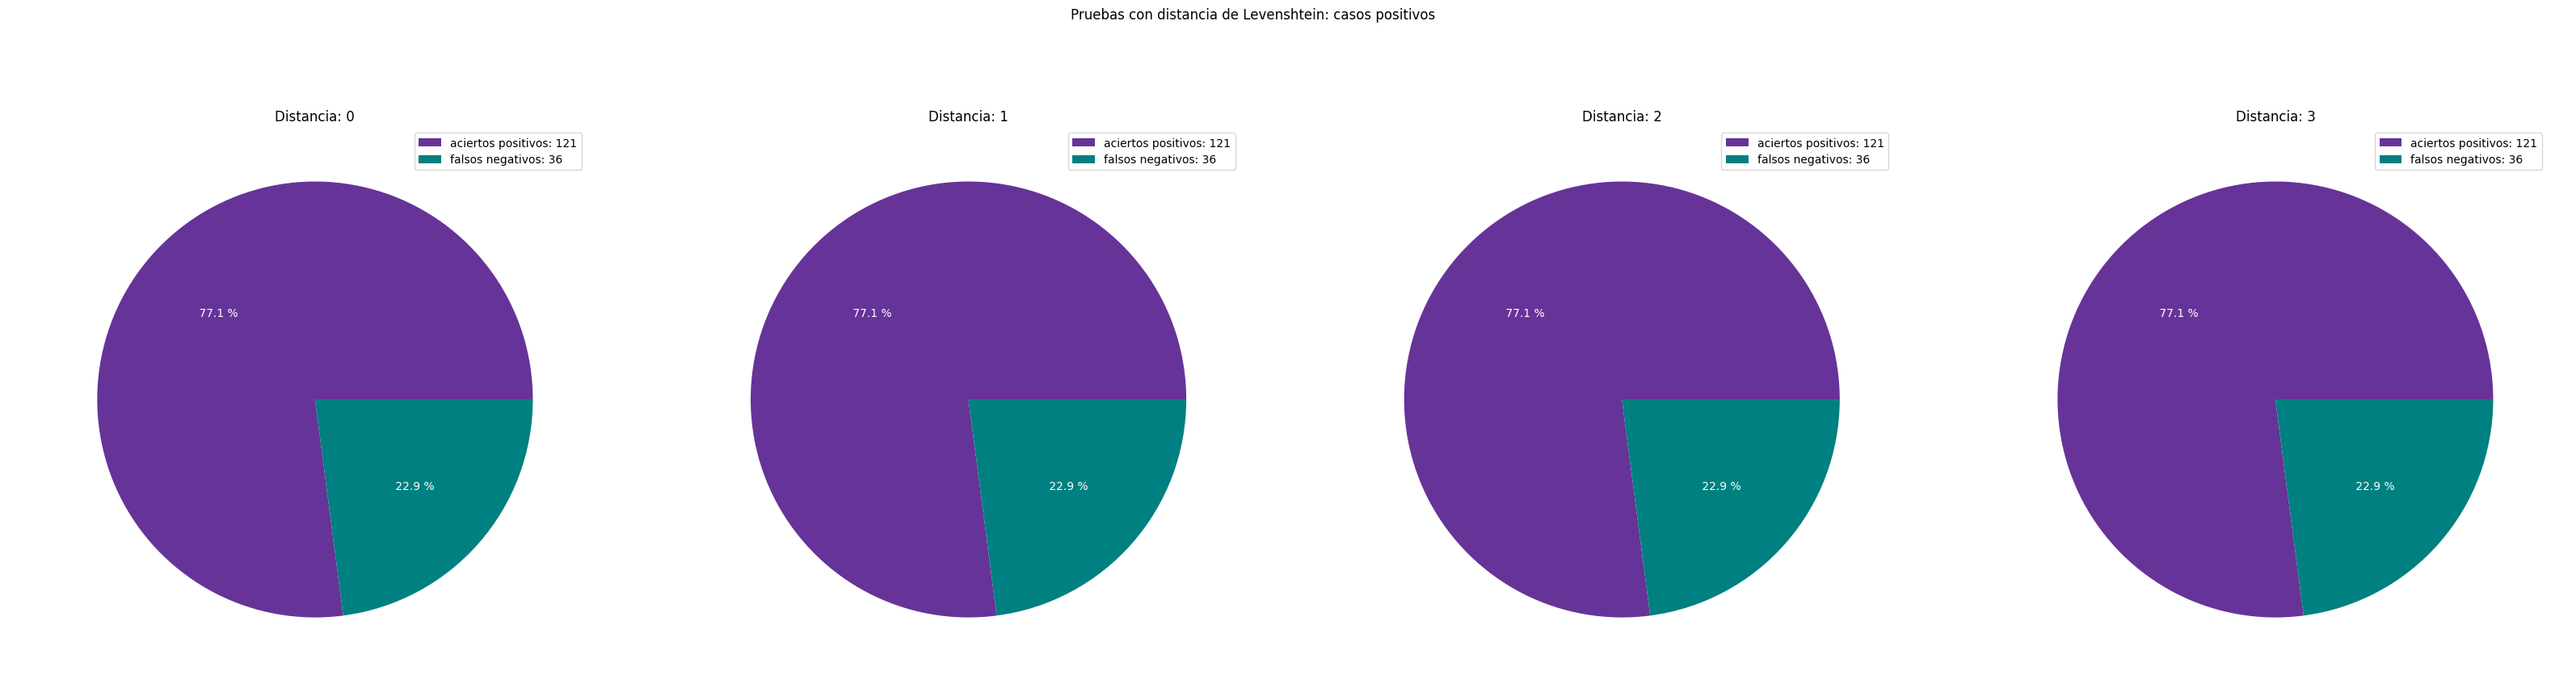

In [6]:
fig, axes = plt.subplots(1, 4, figsize = (40, 10))
fig.suptitle("Pruebas con distancia de Levenshtein: casos positivos ")
for index, row in df_results_val.iterrows():
  y = np.array([row['aciertos_positivos'], row['falsos_negativos']])
  mylabels = ['aciertos positivos: ' + str(row['aciertos_positivos']), 'falsos negativos: ' + str(row['falsos_negativos'])]

  axes[index].pie(y, labels = mylabels, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})
  axes[index].set_title("Distancia: " + str(index))
  axes[index].legend()

plt.show()

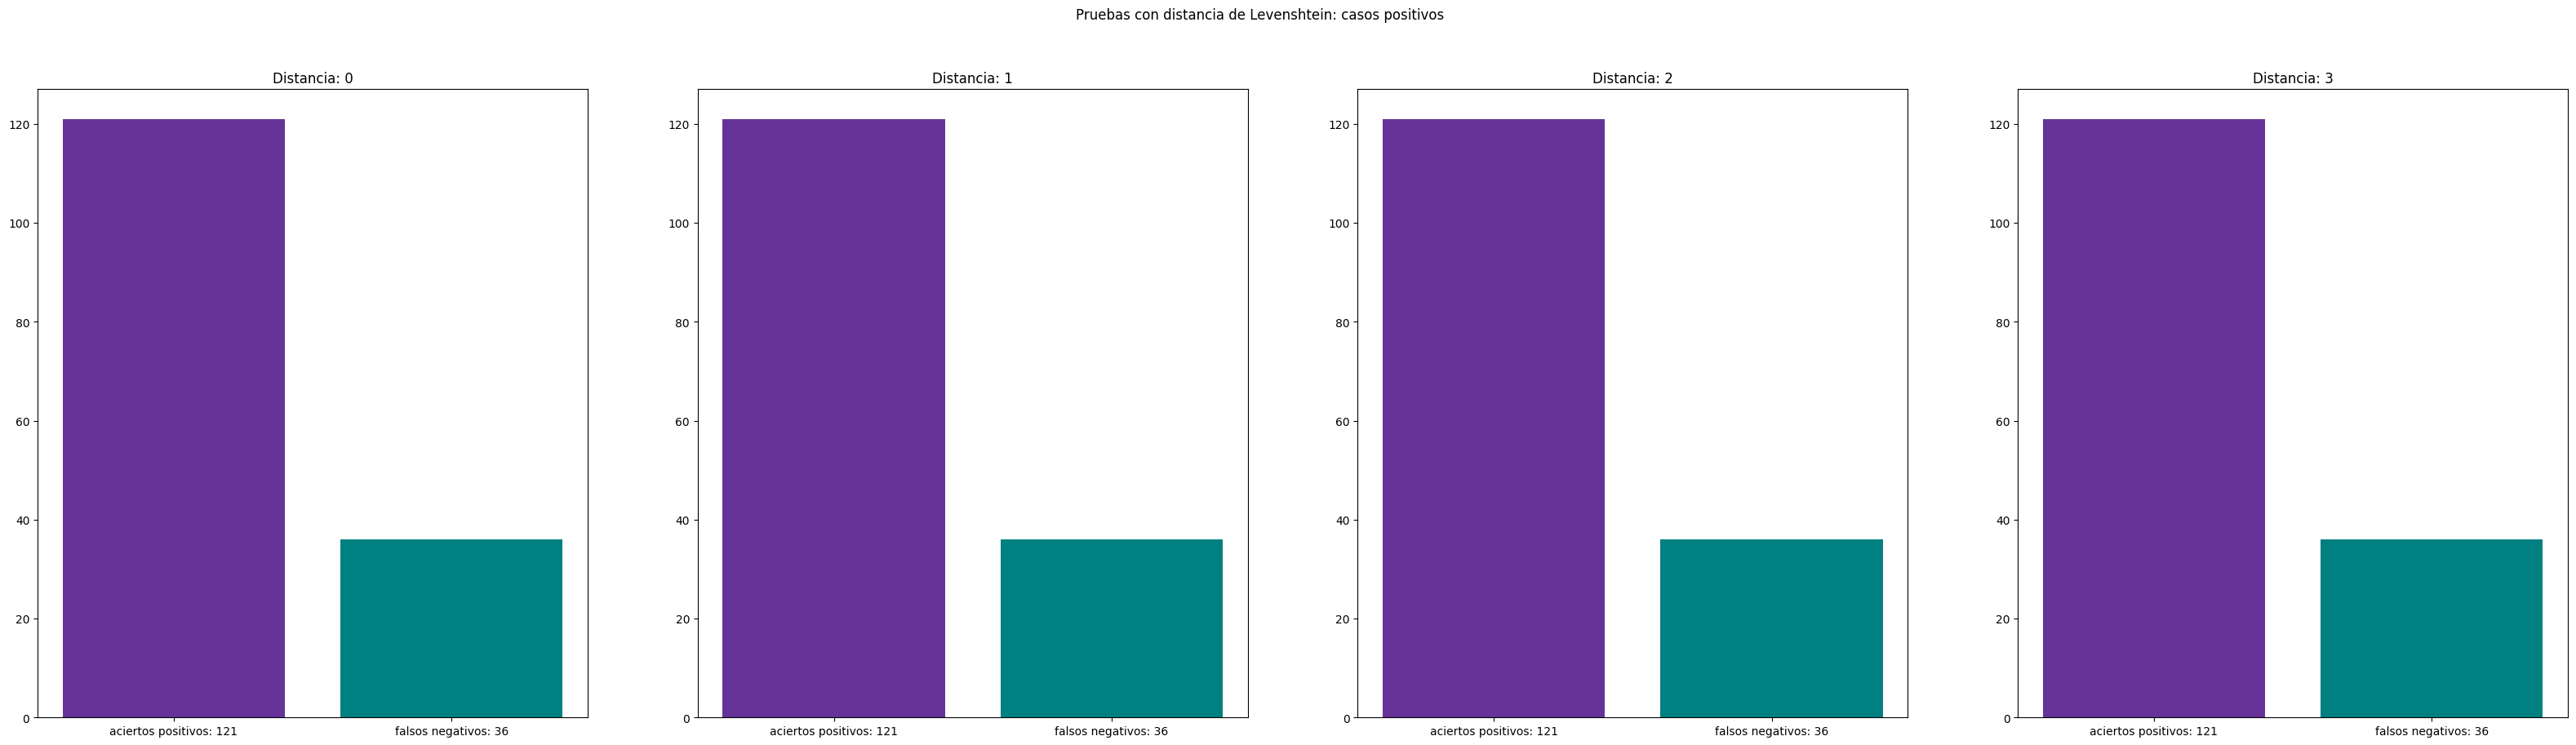

In [8]:
fig, axes = plt.subplots(1, 4, figsize = (40, 10))
fig.suptitle("Pruebas con distancia de Levenshtein: casos positivos ")
for index, row in df_results_val.iterrows():
  y = np.array([row['aciertos_positivos'], row['falsos_negativos']])
  mylabels = ['aciertos positivos: ' + str(row['aciertos_positivos']), 'falsos negativos: ' + str(row['falsos_negativos'])]

  axes[index].bar(mylabels, y, color = ['rebeccapurple', 'teal'])
  axes[index].set_title("Distancia: " + str(index))

plt.show()

### Casos etiquetados como **negativos**
Se muestran los aciertos negativos y los falsos positivos, que suman los casos que están etiquetados como 0, es decir, los que no tienen ningún autor con el que enlazarse.

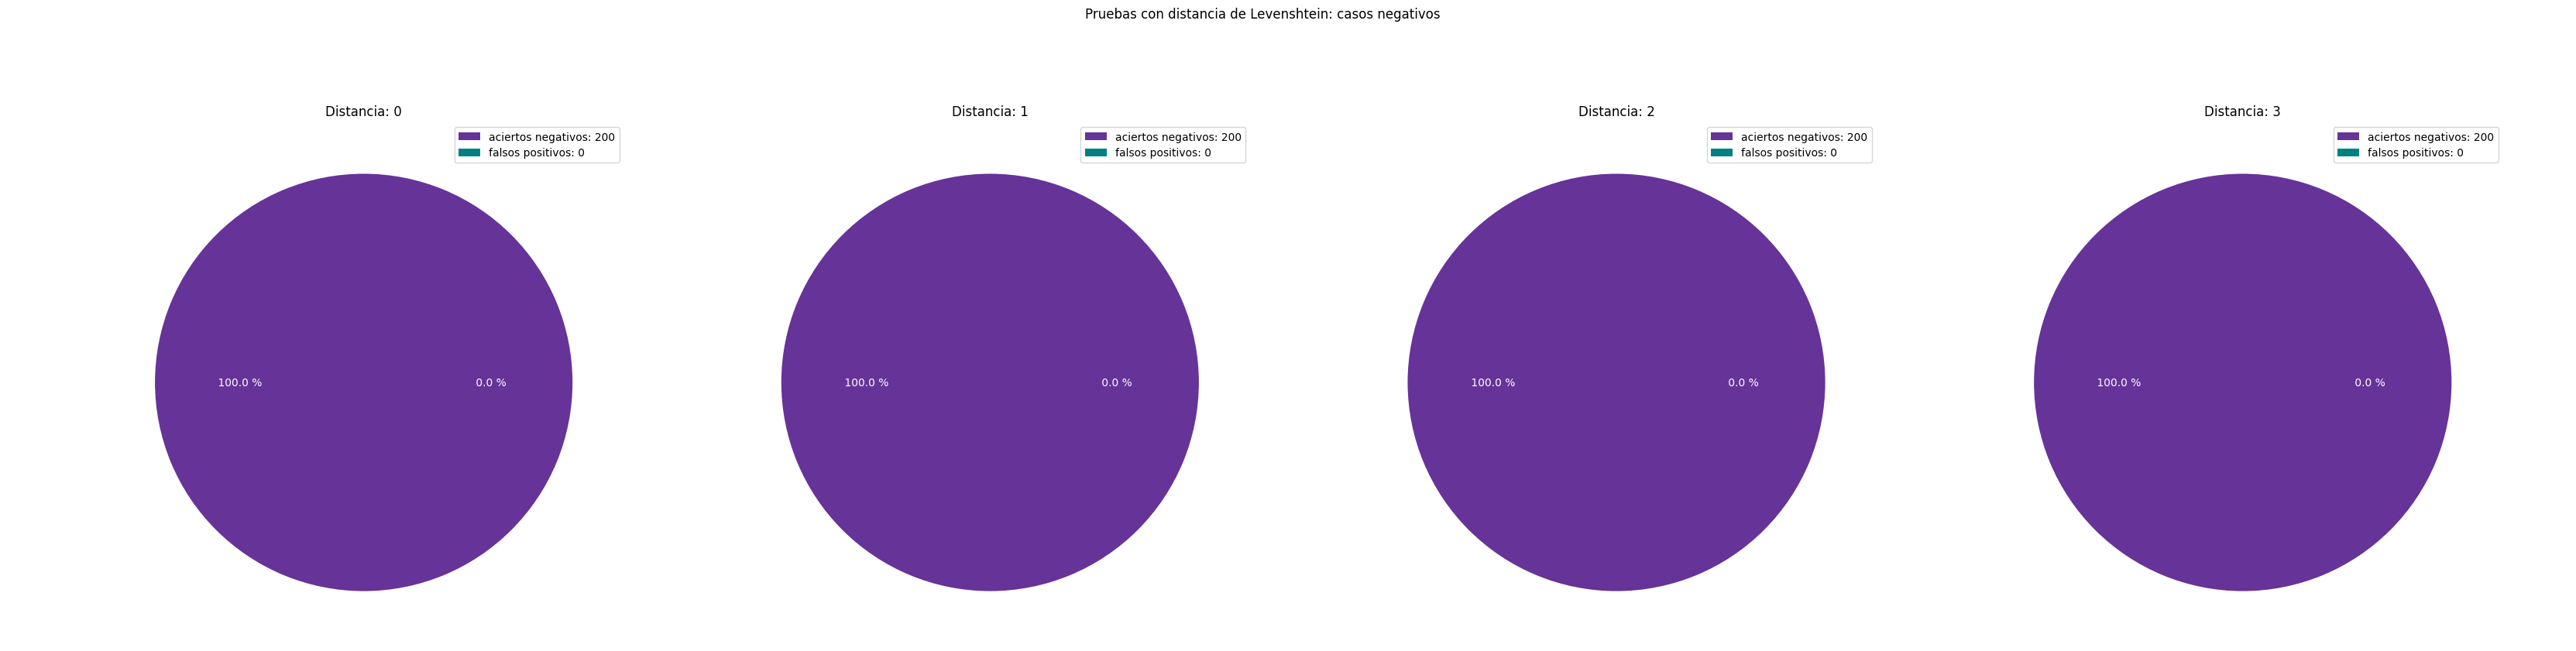

In [7]:
fig, axes = plt.subplots(1, 4, figsize = (40, 10))
fig.suptitle("Pruebas con distancia de Levenshtein: casos negativos ")
for index, row in df_results_val.iterrows():
  y = np.array([row['aciertos_negativos'], row['falsos_positivos']])
  mylabels = ['aciertos negativos: ' + str(row['aciertos_negativos']), 'falsos positivos: ' + str(row['falsos_positivos'])]

  axes[index].pie(y, labels = mylabels, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})
  axes[index].set_title("Distancia: " + str(index))
  axes[index].legend()

plt.show()

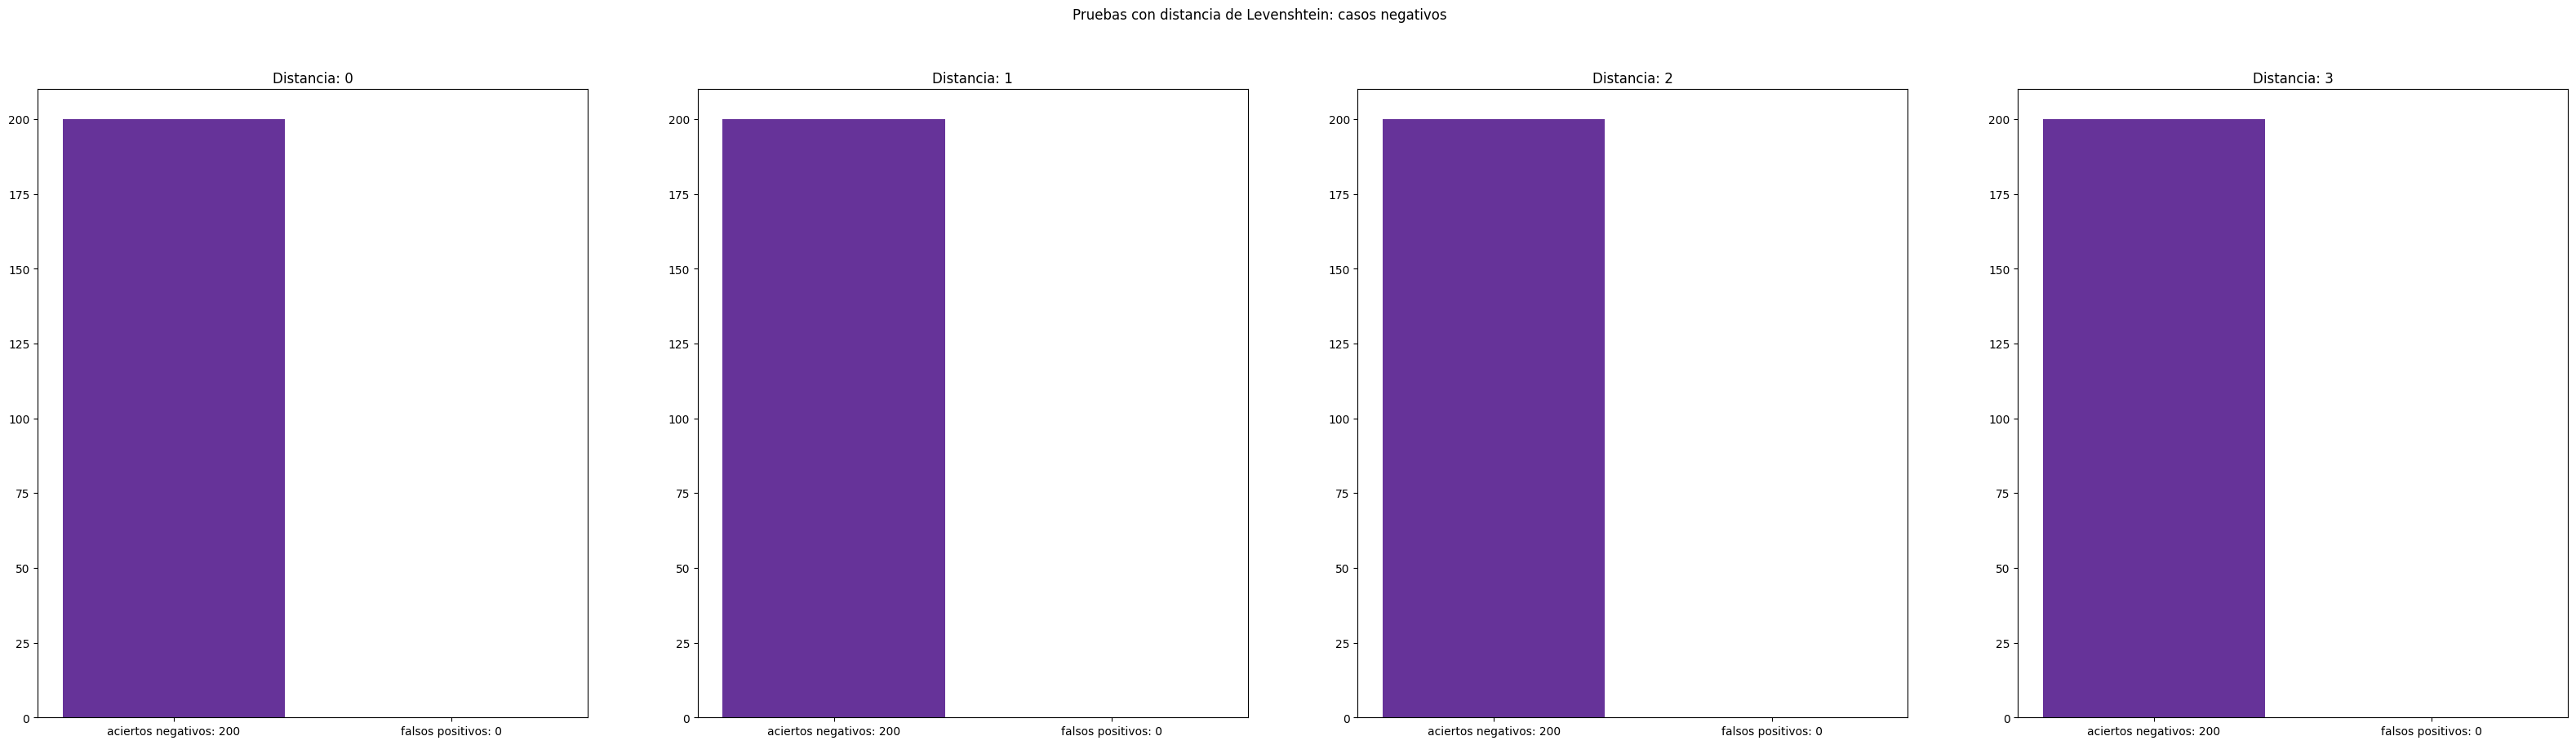

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (40, 10))
fig.suptitle("Pruebas con distancia de Levenshtein: casos negativos ")
for index, row in df_results_val.iterrows():
  y = np.array([row['aciertos_negativos'], row['falsos_positivos']])
  mylabels = ['aciertos negativos: ' + str(row['aciertos_negativos']), 'falsos positivos: ' + str(row['falsos_positivos'])]

  axes[index].bar(mylabels, y, color = ['rebeccapurple', 'teal'])
  axes[index].set_title("Distancia: " + str(index))

plt.show()

In [ ]:
import sklearn.metrics as metrics

df_metrics = pd.DataFrame(columns=['threshold', 'accuracy', 'f1', 'precision'])
for i in range(0,4):
  df_row = pd.DataFrame({'threshold': [i],
                        'accuracy': [metrics.accuracy_score(df_val_set['label'], (df_val_set['levenshtein'] <= i).astype(int))],
                        'f1' : [metrics.f1_score(df_val_set['label'], (df_val_set['levenshtein'] <= i).astype(int))],
                         'precision': [metrics.precision_score(df_val_set['label'], (df_val_set['levenshtein'] <= i).astype(int))]})
  df_metrics = df_metrics.append(df_row, ignore_index = True)

<ipython-input-18-d5c3a7b8db59>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_row, ignore_index = True)
<ipython-input-18-d5c3a7b8db59>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_row, ignore_index = True)
<ipython-input-18-d5c3a7b8db59>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_row, ignore_index = True)
<ipython-input-18-d5c3a7b8db59>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(df_row, ignore_index = True)


In [ ]:
df_metrics

,threshold,accuracy,f1,precision
0,0,0.89916,0.870504,1.0
1,1,0.89916,0.870504,1.0
2,2,0.89916,0.870504,1.0
3,3,0.89916,0.870504,1.0


# Métricas


In [ ]:
df_val_set = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/v2/lev_result_test.csv', index_col = 0)

In [ ]:
threshold = [0, 2, 4, 6, 7, 8, 10]
test = []
for i in threshold:
  print('Threshold: ' + str(i))
  evaluate_model(df_val_set['label'], (df_val_set['levenshtein'] <= i))

Threshold: 0
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       100
           1       1.00      0.04      0.07        52

    accuracy                           0.67       152
   macro avg       0.83      0.52      0.44       152
weighted avg       0.78      0.67      0.55       152

Accuracy -> 67.11%



Threshold: 2
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       100
           1       1.00      0.08      0.14        52

    accuracy                           0.68       152
   macro avg       0.84      0.54      0.47       152
weighted avg       0.79      0.68      0.58       152

Accuracy -> 68.42%



Threshold: 4
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.71      0.96      0.81       100
           1       0.75      0.23      0.35        52

    accuracy                           0.71       152
   macro avg       0.73      0.60      0.58       152
weighted avg       0.72      0.71      0.66       152

Accuracy -> 71.05%



Threshold: 6
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        52

    accuracy                           0.79       152
   macro avg       0.79      0.73      0.74       152
weighted avg       0.79      0.79      0.78       152

Accuracy -> 78.95%



Threshold: 7
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.73      0.62      0.67        52

    accuracy                           0.79       152
   macro avg       0.77      0.75      0.76       152
weighted avg       0.78      0.79      0.78       152

Accuracy -> 78.95%



Threshold: 8
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       100
           1       0.68      0.69      0.69        52

    accuracy                           0.78       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.78      0.78      0.78       152

Accuracy -> 78.29%



Threshold: 10
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       100
           1       0.54      0.88      0.67        52

    accuracy                           0.70       152
   macro avg       0.73      0.75      0.70       152
weighted avg       0.78      0.70      0.71       152

Accuracy -> 70.39%

